# AIBE Project
_Benet Fité, Jon Lecumberri and Oriol Bustos_

## Table of contents

- [Imports and loading](#0-imports-and-data-loading)
- [EDA clustering](#1-eda-clustering)
- [Dimensionality reduction](#2-dimensionality-reduction--feature-extraction)
- [Classification](#3-classification-via-diverse-algorithms)

## 0. Imports and data loading

In [56]:
# Imports
import numpy as np
import sys 
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import *
from sklearn.decomposition import PCA
from keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Embedding, Flatten
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam,RMSprop
from sklearn.cluster import KMeans
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [57]:
# Load your dataset
data = pd.read_csv('..\data\heart_data_processed.csv')
data = data.drop('Unnamed: 0', axis=1)
# Process gender
data['gender_encoded'] = data['gender'].map({'M': 1, 'F': 0})
data = data.drop('gender', axis=1)

data.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_encoded
0,50.39,168,62.0,110,80,1,1,0,0,1,0,36.90,1
1,55.42,156,85.0,140,90,3,1,0,0,1,1,54.49,0
2,51.66,165,64.0,130,70,3,1,0,0,0,1,38.79,0
3,48.28,169,82.0,150,100,1,1,0,0,1,1,48.52,1
4,47.87,156,56.0,100,60,1,1,0,0,0,0,35.90,0


In [58]:
# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)
print("Python version: ", sys.version)

# Verify if TensorFlow can access GPU
is_gpu_available = tf.config.list_physical_devices('GPU')
print("Is GPU Available:", is_gpu_available)

# Check CUDA and cuDNN version if GPU is available
if is_gpu_available:
    # CUDA version
    cuda_version = tf.sysconfig.get_build_info()["cuda_version"]
    print("CUDA Version:", cuda_version)
    
    # cuDNN version
    cudnn_version = tf.sysconfig.get_build_info()["cudnn_version"]
    print("cuDNN Version:", cudnn_version)
else:
    print("CUDA and cuDNN versions can only be checked if a GPU is available.")

# Additional check for devices available to TensorFlow
print("Devices available to TensorFlow:")
print(tf.config.list_physical_devices())

TensorFlow Version: 2.10.0
Python version:  3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
Is GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CUDA Version: 64_112
cuDNN Version: 64_8
Devices available to TensorFlow:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [59]:
# Splitting the dataset into features and target variable
X = data.drop('cardio', axis=1)  # Features
y = data['cardio']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardizing the features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. EDA: Clustering

podem fer k-means, dbscan, yoqse

Silhouette score is a measure of how well-separated the clusters are in a clustering algorithm, goes from -1 to +1


Silhouette scores for different cluster sizes:
Cluster size: 2, Silhouette score: 0.3006131495911031
Cluster size: 3, Silhouette score: 0.19001753845488603
Cluster size: 4, Silhouette score: 0.15004998067533223
Cluster size: 5, Silhouette score: 0.174064808966958
Cluster size: 6, Silhouette score: 0.16499900732284653
Cluster size: 7, Silhouette score: 0.17597479137484479
Cluster size: 8, Silhouette score: 0.12862371188065513
Cluster size: 9, Silhouette score: 0.13183475376317036
Cluster size: 10, Silhouette score: 0.15025422697728816


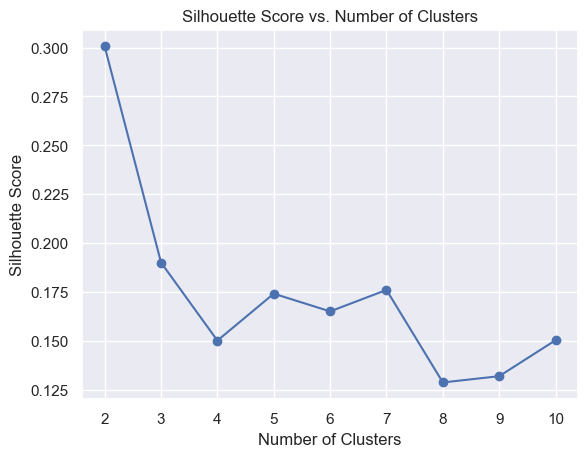

In [36]:
cluster_sizes = range(2, 11)
silhouette_scores = {}

for size in cluster_sizes:
    kmeans = KMeans(n_clusters=size, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores[size] = silhouette_score(X_scaled, labels)


# prints and plots
print("Silhouette scores for different cluster sizes:")
for size, score in silhouette_scores.items():
    print(f"Cluster size: {size}, Silhouette score: {score}")

plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, random_state=69)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

data['cluster'] = cluster_labels

print(data['cluster'].value_counts())

c:\Users\bfite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    27746
0    14845
2    13865
3     6079
4     5744
Name: count, dtype: int64


In [7]:
data.to_csv('data_clustered.csv', index = False)
data.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_encoded,cluster
0,50.39,168,62.0,110,80,1,1,0,0,1,0,36.90,1,0
1,55.42,156,85.0,140,90,3,1,0,0,1,1,54.49,0,2
2,51.66,165,64.0,130,70,3,1,0,0,0,1,38.79,0,1
3,48.28,169,82.0,150,100,1,1,0,0,1,1,48.52,1,2
4,47.87,156,56.0,100,60,1,1,0,0,0,0,35.90,0,1


In [4]:
# Run to reload the clustered dataset
data_clustered = pd.read_csv('data_clustered.csv')

In [11]:
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender_encoded']

# Group by 'cluster' and compute the required statistics
cluster_stats = data_clustered.groupby('cluster').agg(
    cardio_1_count=('cardio', lambda x: (x == 1).sum()),
    cardio_0_count=('cardio', lambda x: (x == 0).sum()),
    age_mean=('age', 'mean'),
    age_std=('age', 'std'),
    height_mean=('height', 'mean'),
    height_std=('height', 'std'),
    weight_mean=('weight', 'mean'),
    weight_std=('weight', 'std'),
    ap_hi_mean=('ap_hi', 'mean'),
    ap_hi_std=('ap_hi', 'std'),
    ap_lo_mean=('ap_lo', 'mean'),
    ap_lo_std=('ap_lo', 'std')
)

# Add percentage of cardio_1 and cardio_0
cluster_stats['cardio_1_percentage'] = (cluster_stats['cardio_1_count'] / (cluster_stats['cardio_1_count'] + cluster_stats['cardio_0_count'])) * 100
cluster_stats['cardio_0_percentage'] = (cluster_stats['cardio_0_count'] / (cluster_stats['cardio_1_count'] + cluster_stats['cardio_0_count'])) * 100

# Calculate frequency tables for categorical variables
for col in categorical_cols:
    frequency_table = data_clustered.groupby('cluster')[col].value_counts(normalize=True).unstack().add_prefix(f'{col}_')
    cluster_stats = pd.concat([cluster_stats, frequency_table], axis=1)



,cardio_1_count,cardio_0_count,age_mean,age_std,height_mean,height_std,weight_mean,weight_std,ap_hi_mean,ap_hi_std,...,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,gender_encoded_0,gender_encoded_1
cluster,,,,,,,,,,,,,,,,,,,,,
0,6779,8066,52.802226,6.979919,170.532098,6.451068,74.756484,10.892416,124.500438,12.722536,...,0.051465,0.000404,1.000000,NaN,0.956618,0.043382,0.208825,0.791175,0.020546,0.979454
1,10244,17502,52.340982,6.706876,161.432062,6.426199,66.121063,8.704003,119.158834,12.045255,...,0.044763,0.000649,0.998703,0.001297,0.983385,0.016615,0.194587,0.805413,0.985223,0.014777
2,10318,3547,55.279244,6.205087,162.421204,7.323723,87.710691,14.826267,141.684097,17.274498,...,0.098666,0.003678,0.995961,0.004039,0.961197,0.038803,0.196105,0.803895,0.840606,0.159394
3,3854,2225,55.819474,5.937363,163.509294,7.579883,76.868268,14.027343,130.341833,15.767059,...,0.189669,0.810331,0.968909,0.031091,0.965290,0.034710,0.210561,0.789439,0.732357,0.267643
4,2645,3099,52.151931,6.844894,169.652507,7.144858,76.897545,14.035495,127.818593,17.074281,...,0.088614,0.034819,NaN,1.000000,0.685411,0.314589,0.162604,0.837396,0.111943,0.888057


## 2. Dimensionality reduction / feature extraction

autoencoders poden aprendre les variables mes important en un latent space, desfent i refent les dades.
sino pca's i tal

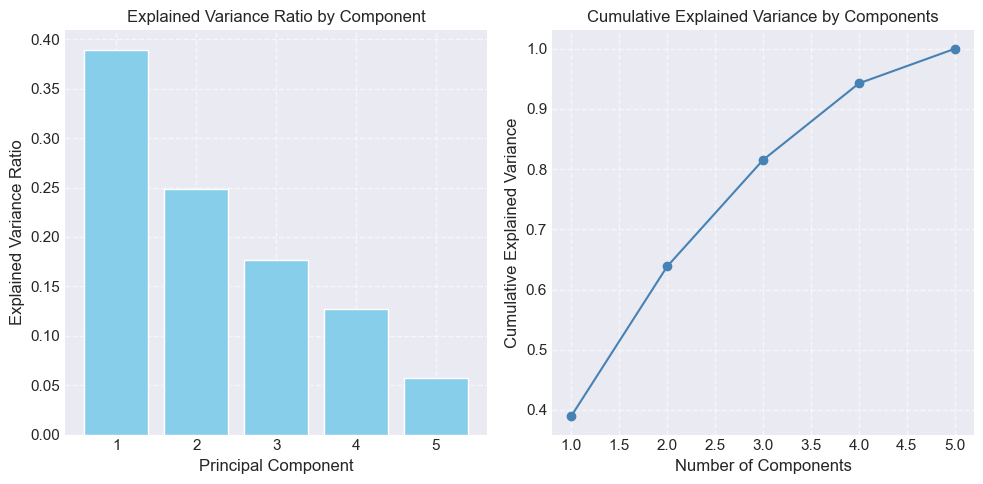

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA only on continuous variables
pca = PCA()
scaler_all = StandardScaler()
X_scaled = scaler_all.fit_transform(X[['age','height','weight','ap_hi','ap_lo']])
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components = len(explained_variance_ratio)

# Styling
plt.style.use('seaborn-v0_8-darkgrid')  # Correct style name
plt.rcParams.update({'font.size': 12})  # Font size for better readability

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot explained variance ratio
axs[0].bar(range(1, num_components + 1), explained_variance_ratio, color='skyblue')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Explained Variance Ratio')
axs[0].set_title('Explained Variance Ratio by Component')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plot cumulative explained variance
axs[1].plot(range(1, num_components + 1), cumulative_explained_variance, marker='o', linestyle='-', color='steelblue')
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Cumulative Explained Variance')
axs[1].set_title('Cumulative Explained Variance by Components')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [61]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [62]:
# Retain 3 principal components
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
PC_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the reduced dataset
print(PC_df.head())
print(PC_df.shape)


        PC1       PC2       PC3
0 -1.107098  0.261186  0.203322
1  1.304298 -0.810772  0.254681
2 -0.948304 -0.081060  0.037439
3  2.204071  0.475014  1.336506
4 -3.245189 -0.536346  0.159434
(68279, 3)


## 3. Classification via diverse algorithms

### Default models

In [63]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.7264
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6950
           1       0.75      0.66      0.70      6706

    accuracy                           0.73     13656
   macro avg       0.73      0.73      0.72     13656
weighted avg       0.73      0.73      0.73     13656

Training Decision Tree...
Decision Tree Accuracy: 0.6300
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6950
           1       0.62      0.62      0.62      6706

    accuracy                           0.63     13656
   macro avg       0.63      0.63      0.63     13656
weighted avg       0.63      0.63      0.63     13656

Training Random Forest...
Random Forest Accuracy: 0.7117
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6950
           1       0.71      0.69      0.70      6706


### Manually tuned models

In [63]:
### Lasso

In [67]:
# Initialize and fit Lasso regression model
lasso = Lasso(alpha=0.01)  # You can adjust alpha (regularization parameter) as needed
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred = lasso.predict(X_test_scaled)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Optionally, you can also get the coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

Accuracy: 0.7281780902167545
Precision: 0.7693771626297577
Recall: 0.6514796366832698
F1 Score: 0.7055370458511819
Confusion Matrix:
[[5497 1333]
 [2379 4447]]
Mean Squared Error: 0.19196943608389663
R^2 Score: 0.23212218978266996
           Feature  Coefficient
0              age     0.061565
1           height    -0.000000
2           weight     0.000000
3            ap_hi     0.156156
4            ap_lo     0.024154
5      cholesterol     0.053609
6             gluc    -0.000000
7            smoke    -0.000000
8             alco    -0.001470
9           active    -0.009802
10             BMI     0.022880
11  gender_encoded    -0.000000


### Logistic regression

Accuracy: 0.7243702401874634

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6765
           1       0.76      0.66      0.71      6891

    accuracy                           0.72     13656
   macro avg       0.73      0.72      0.72     13656
weighted avg       0.73      0.72      0.72     13656


Confusion Matrix:
[[5327 1438]
 [2326 4565]]


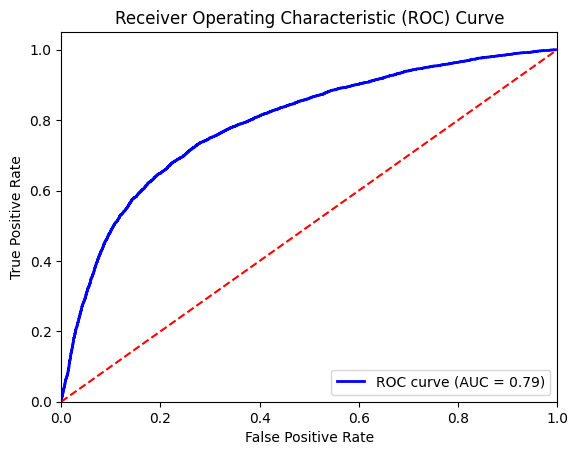

In [20]:
# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute predicted probabilities
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation strategy
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.72517575 0.7276655  0.7276655  0.72986233 0.72478945]
Mean CV Score: 0.7270317045907209
Standard Deviation of CV Scores: 0.001859467368279013


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix

# Define the number of neighbors for the KNN classifier
k = 5

# Initialize and fit the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation strategy
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_scaled, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.695372   0.69332162 0.69061219 0.70108377 0.69469059]
Mean CV Score: 0.6950160323753592
Standard Deviation of CV Scores: 0.003444270939704922


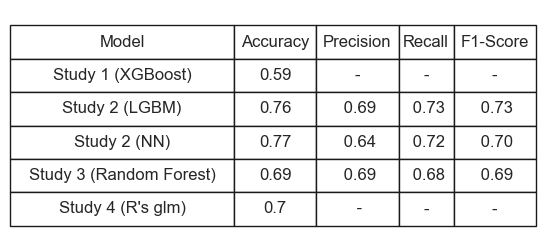

In [54]:
from io import StringIO

# SVM example data as provided, assuming these are meant for the KNN model
data = """
Model,Accuracy,Precision,Recall,F1-Score

Study 1 (XGBoost), 0.59,-,-,-
Study 2 (LGBM), 0.76, 0.69, 0.73, 0.73
Study 2 (NN), 0.77, 0.64, 0.72, 0.70
Study 3 (Random Forest), 0.69, 0.69, 0.68, 0.69
Study 4 (R's glm), 0.70, -,-,-

"""

# Load data into DataFrame
df = pd.read_csv(StringIO(data))

fig, ax = plt.subplots(figsize=(6, 3))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjusting column widths for better separation
the_table.auto_set_column_width(col=list(range(len(df.columns))))  # Adjust the width of columns based on content

# Adjust padding in cells for better visibility and separation
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(4, 2)  # Scale table size (width, height)

plt.show()


El SVM sense preprocessing tarda moltissim $O(n_{rows}^2 · n_{features})$, no executar.

In [43]:
# Create and fit the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


## Wide and deep neural network for classification
This architecture has proven to be effective for handling a combination of continuous and categorical features, offering a good balance between memorization and generalization. It's main characteristics are:

* **Wide Component**: The wide component of the model (usually implemented as a linear model) can effectively capture interactions between categorical features. This is important because categorical features often have non-linear relationships with the target variable, and the wide component can capture these interactions efficiently.

* **Deep Component**: The deep component of the model (implemented as a deep neural network) can capture complex patterns and interactions in the data, particularly in the continuous features. Deep neural networks are known for their ability to learn hierarchical representations, which can be beneficial for understanding the relationships between continuous features and the target variable.

In [6]:
# Splitting the dataset into features and target variable
X = data.drop('cardio', axis=1)  # Features
y = data['cardio']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Separate continuous and categorical features
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender_encoded']

X_cont_train = X_train[continuous_cols].values
X_cont_test = X_test[continuous_cols].values

X_cat_train = X_train[categorical_cols].values
X_cat_test = X_test[categorical_cols].values

# Standardize continuous features
scaler = StandardScaler()
X_cont_train_scaled = scaler.fit_transform(X_cont_train)
X_cont_test_scaled = scaler.transform(X_cont_test)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
X_cat_train_encoded = encoder.fit_transform(X_cat_train)
X_cat_test_encoded = encoder.transform(X_cat_test)

### Create the usual Deep and Wide network, with both outputs and minimizing both loss functions at the same time

In [78]:
# Define input layers for continuous and categorical features
cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

# Define embedding layer for categorical features
embedding_size = 10
embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
flat_embedding = Flatten()(embedding_layer)

# Concatenate continuous and categorical inputs
concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

# Define wide component (linear model)
wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

# Define deep component (neural network)
hidden_units = [128, 64, 32, 16]  # Tocar aixo potser tmb
deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
for units in hidden_units[1:]:
    deep_output = Dense(units, activation='relu')(deep_output)
deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Combine wide and deep components into a single model
model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

optimizer = Adam(learning_rate=0.005) # Tocar aixo potser
# optimizer = RMSprop()

# Compile the model
model.compile(optimizer=optimizer,
              loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
              metrics=['accuracy','accuracy'])

In [79]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
          validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
          epochs=100, batch_size=256,
          callbacks=[early_stopping])

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - deep_output_accuracy: 0.7068 - loss: 1.2040 - wide_output_accuracy: 0.6334 - val_deep_output_accuracy: 0.7324 - val_loss: 1.1184 - val_wide_output_accuracy: 0.7221
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - deep_output_accuracy: 0.7317 - loss: 1.1149 - wide_output_accuracy: 0.7230 - val_deep_output_accuracy: 0.7291 - val_loss: 1.1130 - val_wide_output_accuracy: 0.7231
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - deep_output_accuracy: 0.7331 - loss: 1.1043 - wide_output_accuracy: 0.7259 - val_deep_output_accuracy: 0.7313 - val_loss: 1.1105 - val_wide_output_accuracy: 0.7263
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - deep_output_accuracy: 0.7319 - loss: 1.1118 - wide_output_accuracy: 0.7259 - val_deep_output_accuracy: 0.7317 - val_loss: 1.1142 - val_wide_output_accuracy: 0.7231
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - deep_output_accuracy: 0.7343 - loss: 1.1072 - wide_output_accuracy: 0

### Change the optimizer to see if it improves

In [80]:
# Define input layers for continuous and categorical features
cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

# Define embedding layer for categorical features
embedding_size = 10
embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
flat_embedding = Flatten()(embedding_layer)

# Concatenate continuous and categorical inputs
concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

# Define wide component (linear model)
wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

# Define deep component (neural network)
hidden_units = [128, 64, 32, 16]  # Tocar aixo potser tmb
deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
for units in hidden_units[1:]:
    deep_output = Dense(units, activation='relu')(deep_output)
deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Combine wide and deep components into a single model
model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# optimizer = Adam(learning_rate=0.005) # Tocar aixo potser
optimizer = RMSprop()

# Compile the model
model.compile(optimizer=optimizer,
              loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
              metrics=['accuracy','accuracy'])

In [81]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
          validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
          epochs=100, batch_size=256,
          callbacks=[early_stopping])

print('Accuracy = {}'.format(history.history['val_deep_output_accuracy'][-1]))

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - deep_output_accuracy: 0.7132 - loss: 1.2110 - wide_output_accuracy: 0.6718 - val_deep_output_accuracy: 0.7307 - val_loss: 1.1362 - val_wide_output_accuracy: 0.7105
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - deep_output_accuracy: 0.7329 - loss: 1.1253 - wide_output_accuracy: 0.7133 - val_deep_output_accuracy: 0.7324 - val_loss: 1.1186 - val_wide_output_accuracy: 0.7196
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - deep_output_accuracy: 0.7355 - loss: 1.1101 - wide_output_accuracy: 0.7225 - val_deep_output_accuracy: 0.7306 - val_loss: 1.1161 - val_wide_output_accuracy: 0.7234
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - deep_output_accuracy: 0.7370 - loss: 1.1016 - wide_output_accuracy: 0.7267 - val_deep_output_accuracy: 0.7326 - val_loss: 1.1106 - val_wide_output_accuracy: 0.7248
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - deep_output_accuracy: 0.7346 - loss: 1.1023 - wide_output_accuracy: 0

### Remove the wide output to see if it performs better

In [76]:
# Define input layers for continuous and categorical features
cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

# Define embedding layer for categorical features
embedding_size = 10
embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
flat_embedding = Flatten()(embedding_layer)

# Concatenate continuous and categorical inputs
concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

# Define deep component (neural network)
hidden_units = [128, 64, 32, 16]  # Tocar aixo potser tmb
deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
for units in hidden_units[1:]:
    deep_output = Dense(units, activation='relu')(deep_output)
deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Combine wide and deep components into a single model
model = Model(inputs=[cont_inputs, cat_inputs], outputs=[deep_output])
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# optimizer = Adam(learning_rate=0.005) # Tocar aixo potser
optimizer = RMSprop()

# Compile the model
model.compile(optimizer=optimizer,
              loss={'deep_output': 'binary_crossentropy'},
              metrics=['accuracy'])

In [ ]:
model.summary()
plot_model(model, to_file='model_architecture_pca.png', show_shapes=True, show_layer_names=True)

In [77]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

X_train = [X_cont_train_scaled, X_cat_train_encoded]
X_test = [X_cont_test_scaled, X_cat_test_encoded]

# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7134 - loss: 0.5792 - val_accuracy: 0.7317 - val_loss: 0.5494
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7324 - loss: 0.5443 - val_accuracy: 0.7319 - val_loss: 0.5508
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7348 - loss: 0.5405 - val_accuracy: 0.7318 - val_loss: 0.5457
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7298 - loss: 0.5471 - val_accuracy: 0.7274 - val_loss: 0.5514
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7324 - loss: 0.5457 - val_accuracy: 0.7318 - val_loss: 0.5441
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7334 - loss: 0.5417 - val_accuracy: 0.7331 - val_loss: 0.5448
Epoch 7/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7362 - loss: 0.5401 - val_accuracy: 0.7344 - val_loss: 0.5432
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7344 - loss: 0.5413 - val_accu

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['wide_output_accuracy'], label='Wide Train Accuracy')
plt.plot(history.history['val_wide_output_accuracy'], label='Wide Validation Accuracy')
plt.plot(history.history['deep_output_accuracy'], label='Deep Train Accuracy')
plt.plot(history.history['val_deep_output_accuracy'], label='Deep Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['wide_output_loss'], label='Wide Train Loss')
plt.plot(history.history['val_wide_output_loss'], label='Wide Validation Loss')
plt.plot(history.history['deep_output_loss'], label='Deep Train Loss')
plt.plot(history.history['val_deep_output_loss'], label='Deep Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Sembla que a la Epoch 50 la validation accuracy comença a baixar, per tant podriem tenir overfitting a partir de llavors.

## Train a NN on each cluster to better classify patients

In [8]:
kmeans = KMeans(n_clusters=8, random_state=69)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

data['cluster'] = cluster_labels

print(data['cluster'].value_counts())

data.to_csv('data_clustered.csv', index = False)
data.head()

# Run to reload the clustered dataset
data_clustered = pd.read_csv('data_clustered.csv')

6    19823
4    10541
5     9271
3     8846
1     6968
0     5263
7     3975
2     3592
Name: cluster, dtype: int64


In [9]:
# Create a dictionary to store datasets for each cluster
cluster_datasets = {}

# Separate continuous and categorical features
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender_encoded']

# Iterate over unique cluster values
for cluster_value in data_clustered['cluster'].unique():
    # Filter data for the current cluster
    cluster_data = data_clustered[data_clustered['cluster'] == cluster_value]
    # Store the filtered data in the dictionary with cluster value as key
    cluster_datasets[cluster_value] = cluster_data

--------------------------------------------------------
Now running analysis for cluster number 3
--------------------------------------------------------
Epoch 1/100
56/56 [==============================] - 1s 9ms/step - loss: 1.1007 - wide_output_loss: 0.6040 - deep_output_loss: 0.4967 - wide_output_accuracy: 0.7524 - deep_output_accuracy: 0.8166 - val_loss: 0.9775 - val_wide_output_loss: 0.5165 - val_deep_output_loss: 0.4610 - val_wide_output_accuracy: 0.8249 - val_deep_output_accuracy: 0.8249
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.9423 - wide_output_loss: 0.4817 - deep_output_loss: 0.4606 - wide_output_accuracy: 0.8217 - deep_output_accuracy: 0.8217 - val_loss: 0.9266 - val_wide_output_loss: 0.4636 - val_deep_output_loss: 0.4630 - val_wide_output_accuracy: 0.8249 - val_deep_output_accuracy: 0.8249
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.9236 - wide_output_loss: 0.4652 - deep_output_loss: 0.4585 - wide_output_ac

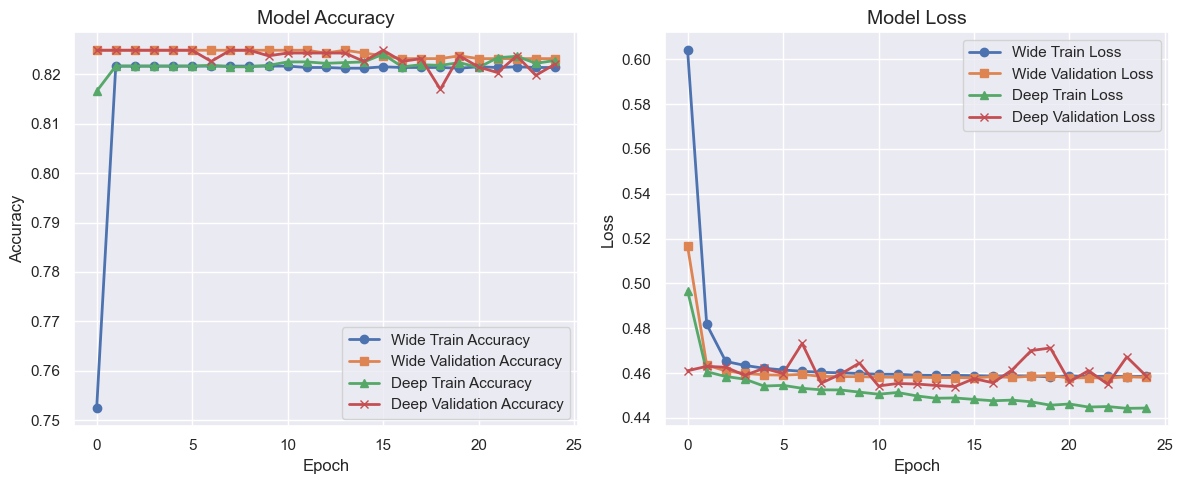

Cluster Accuracies:
Cluster 3: Accuracy = 0.8220


In [25]:
cluster_accuracies = {}  # Dictionary to store accuracies for each cluster

for cluster_value, cluster_data in cluster_datasets.items():
    if cluster_value in [3]:
        print('--------------------------------------------------------')
        print('Now running analysis for cluster number {}'.format(cluster_value))
        print('--------------------------------------------------------')

        # Splitting the dataset into features and target variable
        X = cluster_data.drop('cardio', axis=1)  # Features
        y = cluster_data['cardio']  # Target variable

        # Splitting the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize continuous features
        scaler = StandardScaler()
        X_cont_train_scaled = scaler.fit_transform(X_train[continuous_cols].values)
        X_cont_test_scaled = scaler.transform(X_test[continuous_cols].values)

        # One-hot encode categorical features
        encoder = OneHotEncoder(sparse_output=False)
        X_cat_train_encoded = encoder.fit_transform(X_train[categorical_cols].values)
        X_cat_test_encoded = encoder.transform(X_test[categorical_cols].values)

        # Define input layers for continuous and categorical features
        cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
        cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

        # Define embedding layer for categorical features
        embedding_size = 10
        embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
        flat_embedding = Flatten()(embedding_layer)

        # Concatenate continuous and categorical inputs
        concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

        # Define wide component (linear model)
        wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

        # Define deep component (neural network)
        hidden_units = [128, 64, 32]  # Adjust as needed
        deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
        for units in hidden_units[1:]:
            deep_output = Dense(units, activation='relu')(deep_output)
        deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

        # Combine wide and deep components into a single model
        model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])

        # Compile the model
        optimizer = RMSprop()
        model.compile(optimizer=optimizer,
                    loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
                    metrics=['accuracy'])

        # Define early stopping criteria
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model
        history = model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
                            validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
                            epochs=100, batch_size=128,
                            callbacks=[early_stopping])

        # Get accuracy of the last epoch
        last_epoch_accuracy = history.history['val_deep_output_accuracy'][-1]  
        cluster_accuracies[cluster_value] = last_epoch_accuracy  # Save accuracy for this cluster

        sns.set(style="darkgrid")

        plt.figure(figsize=(12, 5))

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 1)
        plt.plot(history.history['wide_output_accuracy'], label='Wide Train Accuracy', linewidth=2, marker='o')
        plt.plot(history.history['val_wide_output_accuracy'], label='Wide Validation Accuracy', linewidth=2, marker='s')
        plt.plot(history.history['deep_output_accuracy'], label='Deep Train Accuracy', linewidth=2, marker='^')
        plt.plot(history.history['val_deep_output_accuracy'], label='Deep Validation Accuracy', linewidth=2, marker='x')
        plt.title('Model Accuracy', fontsize=14)
        plt.ylabel('Accuracy', fontsize=12)
        plt.xlabel('Epoch', fontsize=12)
        plt.legend()

        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(history.history['wide_output_loss'], label='Wide Train Loss', linewidth=2, marker='o')
        plt.plot(history.history['val_wide_output_loss'], label='Wide Validation Loss', linewidth=2, marker='s')
        plt.plot(history.history['deep_output_loss'], label='Deep Train Loss', linewidth=2, marker='^')
        plt.plot(history.history['val_deep_output_loss'], label='Deep Validation Loss', linewidth=2, marker='x')
        plt.title('Model Loss', fontsize=14)
        plt.ylabel('Loss', fontsize=12)
        plt.xlabel('Epoch', fontsize=12)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Print accuracies for each cluster
print("Cluster Accuracies:")
for cluster_value, accuracy in cluster_accuracies.items():
    print(f"Cluster {cluster_value}: Accuracy = {accuracy:.4f}")


--------------------------------------------------------
Now running analysis for cluster number 2
--------------------------------------------------------
Epoch 1/100
90/90 [==============================] - 1s 8ms/step - loss: 1.3115 - wide_output_loss: 0.7278 - deep_output_loss: 0.5837 - wide_output_accuracy: 0.4309 - deep_output_accuracy: 0.7191 - val_loss: 1.2239 - val_wide_output_loss: 0.6950 - val_deep_output_loss: 0.5289 - val_wide_output_accuracy: 0.5007 - val_deep_output_accuracy: 0.7538
Epoch 2/100
90/90 [==============================] - 0s 5ms/step - loss: 1.1922 - wide_output_loss: 0.6713 - deep_output_loss: 0.5209 - wide_output_accuracy: 0.5980 - deep_output_accuracy: 0.7560 - val_loss: 1.1680 - val_wide_output_loss: 0.6450 - val_deep_output_loss: 0.5230 - val_wide_output_accuracy: 0.6662 - val_deep_output_accuracy: 0.7608
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 1.1390 - wide_output_loss: 0.6273 - deep_output_loss: 0.5117 - wide_output_ac

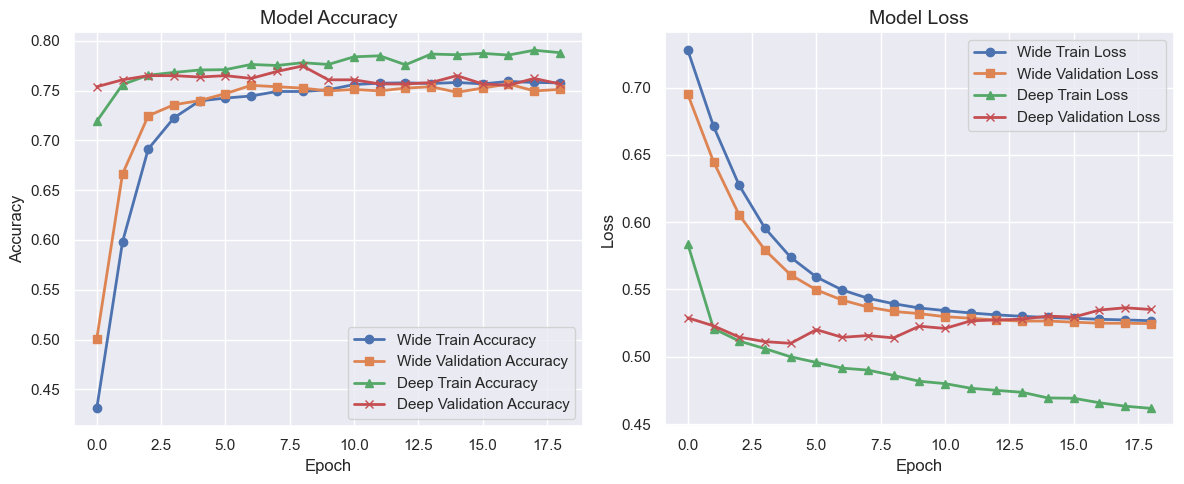

--------------------------------------------------------
Now running analysis for cluster number 7
--------------------------------------------------------
Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 1.2735 - wide_output_loss: 0.6827 - deep_output_loss: 0.5908 - wide_output_accuracy: 0.5456 - deep_output_accuracy: 0.7063 - val_loss: 1.1951 - val_wide_output_loss: 0.6530 - val_deep_output_loss: 0.5421 - val_wide_output_accuracy: 0.6491 - val_deep_output_accuracy: 0.7396
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1716 - wide_output_loss: 0.6354 - deep_output_loss: 0.5363 - wide_output_accuracy: 0.6714 - deep_output_accuracy: 0.7462 - val_loss: 1.1449 - val_wide_output_loss: 0.6136 - val_deep_output_loss: 0.5313 - val_wide_output_accuracy: 0.7195 - val_deep_output_accuracy: 0.7409
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1321 - wide_output_loss: 0.6053 - deep_output_loss: 0.5268 - wide_out

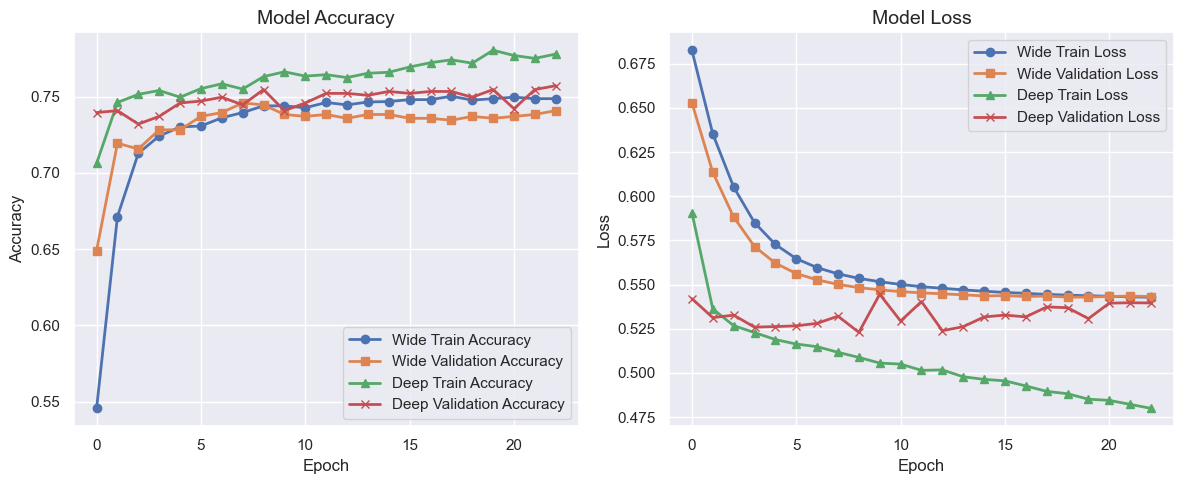

Cluster Accuracies:
Cluster 2: Accuracy = 0.7566
Cluster 7: Accuracy = 0.7572


In [29]:
cluster_accuracies = {}  # Dictionary to store accuracies for each cluster

for cluster_value, cluster_data in cluster_datasets.items():
    if cluster_value in [2,7]:
        print('--------------------------------------------------------')
        print('Now running analysis for cluster number {}'.format(cluster_value))
        print('--------------------------------------------------------')

        # Splitting the dataset into features and target variable
        X = cluster_data.drop('cardio', axis=1)  # Features
        y = cluster_data['cardio']  # Target variable

        # Splitting the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize continuous features
        scaler = StandardScaler()
        X_cont_train_scaled = scaler.fit_transform(X_train[continuous_cols].values)
        X_cont_test_scaled = scaler.transform(X_test[continuous_cols].values)

        # One-hot encode categorical features
        encoder = OneHotEncoder(sparse_output=False)
        X_cat_train_encoded = encoder.fit_transform(X_train[categorical_cols].values)
        X_cat_test_encoded = encoder.transform(X_test[categorical_cols].values)

        # Define input layers for continuous and categorical features
        cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
        cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

        # Define embedding layer for categorical features
        embedding_size = 5
        embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
        flat_embedding = Flatten()(embedding_layer)

        # Concatenate continuous and categorical inputs
        concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

        # Define wide component (linear model)
        wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

        # Define deep component (neural network)
        hidden_units = [64, 32,16]  # Adjust as needed
        deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
        for units in hidden_units[1:]:
            deep_output = Dense(units, activation='relu')(deep_output)
        deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

        # Combine wide and deep components into a single model
        model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])

        # Compile the model
        optimizer = RMSprop()
        model.compile(optimizer=optimizer,
                    loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
                    metrics=['accuracy'])

        # Define early stopping criteria
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model
        history = model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
                            validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
                            epochs=100, batch_size=32,
                            callbacks=[early_stopping])

        # Get accuracy of the last epoch
        last_epoch_accuracy = history.history['val_deep_output_accuracy'][-1]  
        cluster_accuracies[cluster_value] = last_epoch_accuracy  # Save accuracy for this cluster

        sns.set(style="darkgrid")

        plt.figure(figsize=(12, 5))

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 1)
        plt.plot(history.history['wide_output_accuracy'], label='Wide Train Accuracy', linewidth=2, marker='o')
        plt.plot(history.history['val_wide_output_accuracy'], label='Wide Validation Accuracy', linewidth=2, marker='s')
        plt.plot(history.history['deep_output_accuracy'], label='Deep Train Accuracy', linewidth=2, marker='^')
        plt.plot(history.history['val_deep_output_accuracy'], label='Deep Validation Accuracy', linewidth=2, marker='x')
        plt.title('Model Accuracy', fontsize=14)
        plt.ylabel('Accuracy', fontsize=12)
        plt.xlabel('Epoch', fontsize=12)
        plt.legend()

        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(history.history['wide_output_loss'], label='Wide Train Loss', linewidth=2, marker='o')
        plt.plot(history.history['val_wide_output_loss'], label='Wide Validation Loss', linewidth=2, marker='s')
        plt.plot(history.history['deep_output_loss'], label='Deep Train Loss', linewidth=2, marker='^')
        plt.plot(history.history['val_deep_output_loss'], label='Deep Validation Loss', linewidth=2, marker='x')
        plt.title('Model Loss', fontsize=14)
        plt.ylabel('Loss', fontsize=12)
        plt.xlabel('Epoch', fontsize=12)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Print accuracies for each cluster
print("Cluster Accuracies:")
for cluster_value, accuracy in cluster_accuracies.items():
    print(f"Cluster {cluster_value}: Accuracy = {accuracy:.4f}")


--------------------------------------------------------
Now running analysis for cluster number 4
--------------------------------------------------------
Epoch 1/100
66/66 [==============================] - 1s 6ms/step - loss: 1.2515 - wide_output_loss: 0.6488 - deep_output_loss: 0.6027 - wide_output_accuracy: 0.6544 - deep_output_accuracy: 0.6892 - val_loss: 1.2244 - val_wide_output_loss: 0.6323 - val_deep_output_loss: 0.5921 - val_wide_output_accuracy: 0.6871 - val_deep_output_accuracy: 0.6946
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 1.2017 - wide_output_loss: 0.6217 - deep_output_loss: 0.5800 - wide_output_accuracy: 0.6893 - deep_output_accuracy: 0.7065 - val_loss: 1.2055 - val_wide_output_loss: 0.6153 - val_deep_output_loss: 0.5902 - val_wide_output_accuracy: 0.6927 - val_deep_output_accuracy: 0.6980
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 1.1853 - wide_output_loss: 0.6087 - deep_output_loss: 0.5767 - wide_output_ac

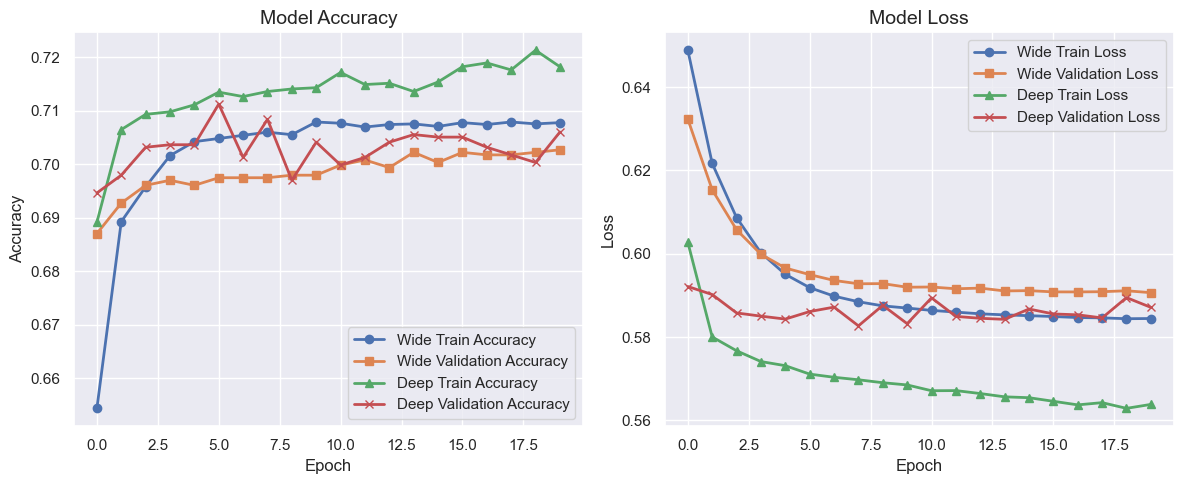

--------------------------------------------------------
Now running analysis for cluster number 5
--------------------------------------------------------
Epoch 1/100
58/58 [==============================] - 1s 6ms/step - loss: 1.3590 - wide_output_loss: 0.7484 - deep_output_loss: 0.6106 - wide_output_accuracy: 0.3720 - deep_output_accuracy: 0.6758 - val_loss: 1.3121 - val_wide_output_loss: 0.7272 - val_deep_output_loss: 0.5849 - val_wide_output_accuracy: 0.3989 - val_deep_output_accuracy: 0.6916
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 1.3034 - wide_output_loss: 0.7156 - deep_output_loss: 0.5878 - wide_output_accuracy: 0.4528 - deep_output_accuracy: 0.6915 - val_loss: 1.2778 - val_wide_output_loss: 0.6971 - val_deep_output_loss: 0.5807 - val_wide_output_accuracy: 0.5040 - val_deep_output_accuracy: 0.6976
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 1.2735 - wide_output_loss: 0.6887 - deep_output_loss: 0.5848 - wide_output_ac

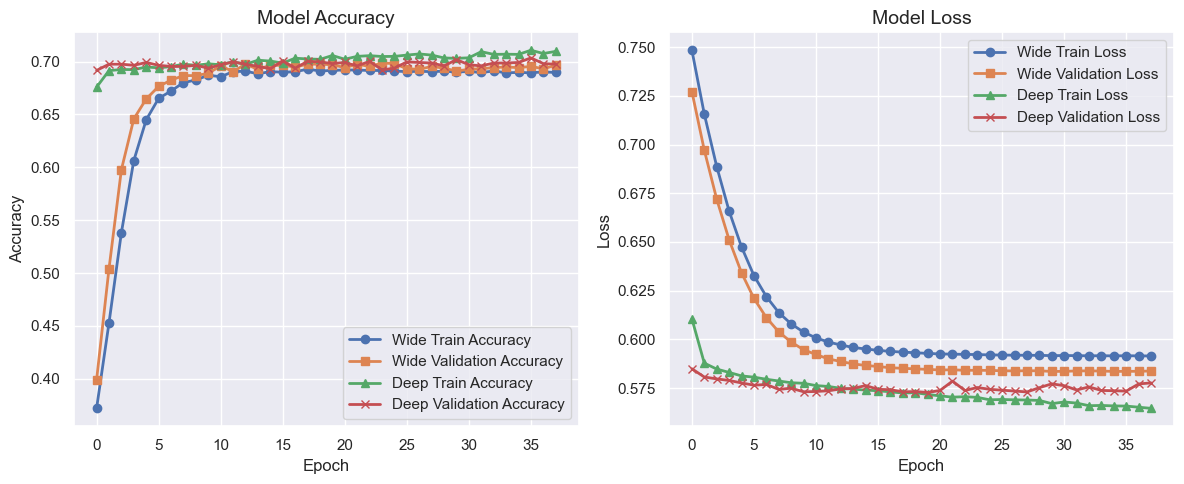

--------------------------------------------------------
Now running analysis for cluster number 1
--------------------------------------------------------
Epoch 1/100
44/44 [==============================] - 1s 7ms/step - loss: 1.2248 - wide_output_loss: 0.6387 - deep_output_loss: 0.5860 - wide_output_accuracy: 0.6441 - deep_output_accuracy: 0.6966 - val_loss: 1.1311 - val_wide_output_loss: 0.5989 - val_deep_output_loss: 0.5323 - val_wide_output_accuracy: 0.6915 - val_deep_output_accuracy: 0.7446
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 1.1572 - wide_output_loss: 0.6028 - deep_output_loss: 0.5544 - wide_output_accuracy: 0.6697 - deep_output_accuracy: 0.7212 - val_loss: 1.1047 - val_wide_output_loss: 0.5723 - val_deep_output_loss: 0.5324 - val_wide_output_accuracy: 0.7066 - val_deep_output_accuracy: 0.7439
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 1.1353 - wide_output_loss: 0.5879 - deep_output_loss: 0.5474 - wide_output_ac

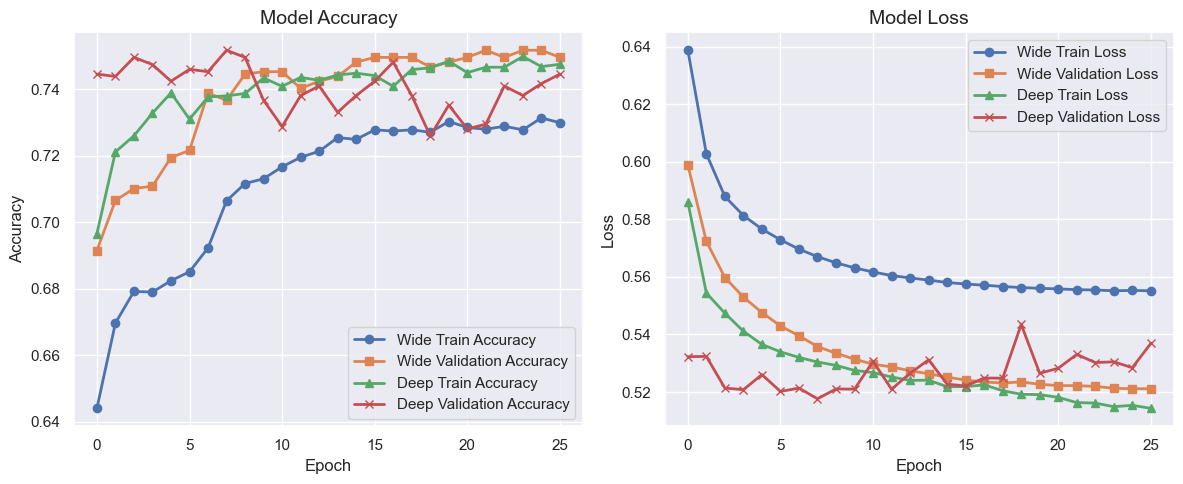

--------------------------------------------------------
Now running analysis for cluster number 6
--------------------------------------------------------
Epoch 1/100
124/124 [==============================] - 1s 5ms/step - loss: 1.2246 - wide_output_loss: 0.6353 - deep_output_loss: 0.5893 - wide_output_accuracy: 0.6579 - deep_output_accuracy: 0.6904 - val_loss: 1.1804 - val_wide_output_loss: 0.6112 - val_deep_output_loss: 0.5692 - val_wide_output_accuracy: 0.6822 - val_deep_output_accuracy: 0.7120
Epoch 2/100
124/124 [==============================] - 1s 4ms/step - loss: 1.1502 - wide_output_loss: 0.5927 - deep_output_loss: 0.5575 - wide_output_accuracy: 0.6901 - deep_output_accuracy: 0.7159 - val_loss: 1.1590 - val_wide_output_loss: 0.5904 - val_deep_output_loss: 0.5686 - val_wide_output_accuracy: 0.6840 - val_deep_output_accuracy: 0.7120
Epoch 3/100
124/124 [==============================] - 0s 4ms/step - loss: 1.1323 - wide_output_loss: 0.5772 - deep_output_loss: 0.5552 - wide_out

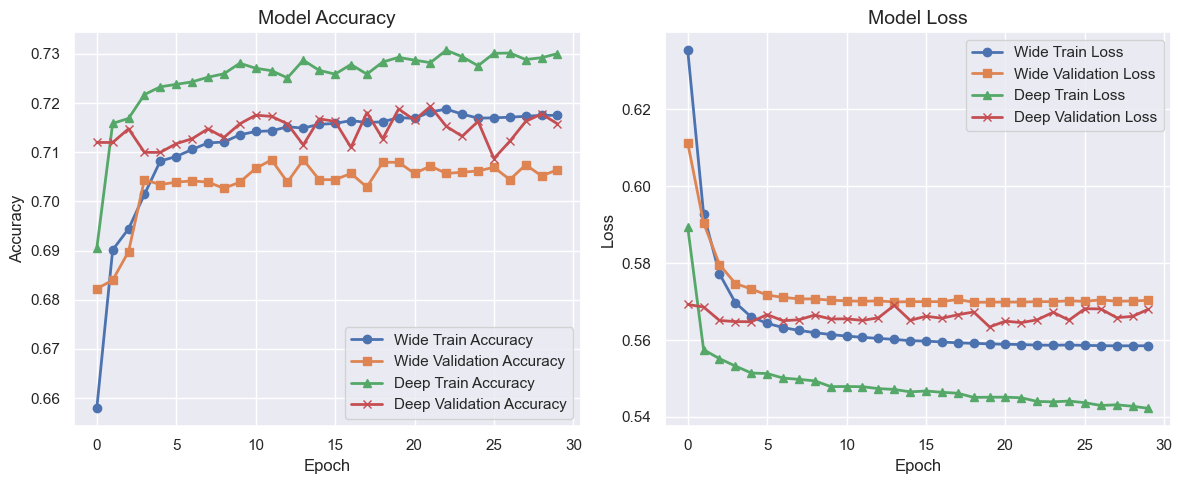

Cluster Accuracies:
Cluster 4: Accuracy = 0.7060
Cluster 5: Accuracy = 0.6976
Cluster 1: Accuracy = 0.7446
Cluster 6: Accuracy = 0.7158


In [10]:
cluster_accuracies = {}  # Dictionary to store accuracies for each cluster

for cluster_value, cluster_data in cluster_datasets.items():
    if cluster_value in [1,4,5,6]:
        print('--------------------------------------------------------')
        print('Now running analysis for cluster number {}'.format(cluster_value))
        print('--------------------------------------------------------')

        # Splitting the dataset into features and target variable
        X = cluster_data.drop('cardio', axis=1)  # Features
        y = cluster_data['cardio']  # Target variable

        # Splitting the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize continuous features
        scaler = StandardScaler()
        X_cont_train_scaled = scaler.fit_transform(X_train[continuous_cols].values)
        X_cont_test_scaled = scaler.transform(X_test[continuous_cols].values)

        # One-hot encode categorical features
        encoder = OneHotEncoder(sparse_output=False)
        X_cat_train_encoded = encoder.fit_transform(X_train[categorical_cols].values)
        X_cat_test_encoded = encoder.transform(X_test[categorical_cols].values)

        # Define input layers for continuous and categorical features
        cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
        cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

        # Define embedding layer for categorical features
        embedding_size = 5
        embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
        flat_embedding = Flatten()(embedding_layer)

        # Concatenate continuous and categorical inputs
        concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

        # Define wide component (linear model)
        wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

        # Define deep component (neural network)
        hidden_units = [64, 32,16]  # Adjust as needed
        deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
        for units in hidden_units[1:]:
            deep_output = Dense(units, activation='relu')(deep_output)
        deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

        # Combine wide and deep components into a single model
        model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])

        # Compile the model
        optimizer = RMSprop()
        model.compile(optimizer=optimizer,
                    loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
                    metrics=['accuracy'])

        # Define early stopping criteria
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model
        history = model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
                            validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
                            epochs=100, batch_size=128,
                            callbacks=[early_stopping])

        # Get accuracy of the last epoch
        last_epoch_accuracy = history.history['val_deep_output_accuracy'][-1]  
        cluster_accuracies[cluster_value] = last_epoch_accuracy  # Save accuracy for this cluster

        sns.set(style="darkgrid")

        plt.figure(figsize=(12, 5))

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 1)
        plt.plot(history.history['wide_output_accuracy'], label='Wide Train Accuracy', linewidth=2, marker='o')
        plt.plot(history.history['val_wide_output_accuracy'], label='Wide Validation Accuracy', linewidth=2, marker='s')
        plt.plot(history.history['deep_output_accuracy'], label='Deep Train Accuracy', linewidth=2, marker='^')
        plt.plot(history.history['val_deep_output_accuracy'], label='Deep Validation Accuracy', linewidth=2, marker='x')
        plt.title('Model Accuracy', fontsize=14)
        plt.ylabel('Accuracy', fontsize=12)
        plt.xlabel('Epoch', fontsize=12)
        plt.legend()

        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(history.history['wide_output_loss'], label='Wide Train Loss', linewidth=2, marker='o')
        plt.plot(history.history['val_wide_output_loss'], label='Wide Validation Loss', linewidth=2, marker='s')
        plt.plot(history.history['deep_output_loss'], label='Deep Train Loss', linewidth=2, marker='^')
        plt.plot(history.history['val_deep_output_loss'], label='Deep Validation Loss', linewidth=2, marker='x')
        plt.title('Model Loss', fontsize=14)
        plt.ylabel('Loss', fontsize=12)
        plt.xlabel('Epoch', fontsize=12)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Print accuracies for each cluster
print("Cluster Accuracies:")
for cluster_value, accuracy in cluster_accuracies.items():
    print(f"Cluster {cluster_value}: Accuracy = {accuracy:.4f}")


In [11]:
# Calculate the weight for each cluster (size of the cluster)
cluster_weights = {cluster_value: len(cluster_data) for cluster_value, cluster_data in cluster_datasets.items()}

# Calculate weighted mean accuracy
weighted_sum = sum(cluster_accuracies[cluster_value] * weight for cluster_value, weight in cluster_weights.items())
total_samples = sum(cluster_weights.values())
weighted_mean_accuracy = weighted_sum / total_samples

# Print the weighted mean accuracy
print("Weighted Mean Accuracy:", weighted_mean_accuracy)

KeyError: 3